C:\Users\VikA\AppData\Local\Temp\ipykernel_7948\2804075335.py:9: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,91,95,96,97,99,131,132,133,135,136,140,141,142,144,145,146,147,148,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,207,208,211,212,213,215,216,239,240,241,243,244,245,459,467,563,567,571,575,579,580,583,611,612,795,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1047,1055,1063,1064,1071,1072,1073,1074,1175,1176,1177,1178,1179,1180,1181,1182,1277,1278,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1653,1654,1656,2193,2194,2195,2196,2199) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('valid.csv')


  report_date  client_id  target  col1  col2  col3  col4  col5  col6  col7  \
0  2023-04-01          2       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  2023-05-01          4       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  2023-05-01          9       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  2023-03-01         12       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  2023-03-01         14       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   ...     col2654     col2655     col2656  col2657  col2658  col2659  \
0  ...   4941670.0   4941670.0   4941670.0      NaN      NaN      NaN   
1  ...  11789500.0  11789500.0  11789500.0      NaN      NaN      NaN   
2  ...   7000000.0   7000000.0   7000000.0      NaN      NaN      NaN   
3  ...         NaN         NaN         NaN      NaN      NaN      NaN   
4  ...         NaN         NaN         NaN      NaN      NaN      NaN   

      col2660     col2661     col2662   col2663  
0   4941670.0   4941670.0   4941670.0  0.2

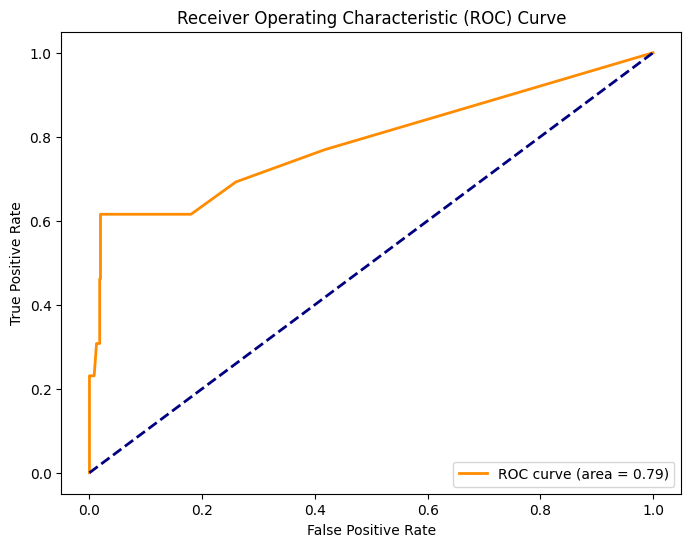

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('valid.csv')

# Предварительный анализ данных
print(df.head())
print(df.info())

# Удаление строковых столбцов (если они не нужны)
df = df.select_dtypes(include=['number'])

# Если нужно сохранить строковые столбцы, можно их закодировать
# Например, используем LabelEncoder для кодирования строковых значений
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Выбор признаков и целевой переменной
X = df.drop(columns=['target'])  # Удаляем целевую переменную
y = df['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Подробная оценка модели
print(classification_report(y_test, y_pred))

# Вычисление ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Построение графика ROC-AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

C:\Users\VikA\AppData\Local\Temp\ipykernel_6780\2253223579.py:9: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,91,95,96,97,99,131,132,133,135,136,140,141,142,144,145,146,147,148,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,207,208,211,212,213,215,216,239,240,241,243,244,245,459,467,563,567,571,575,579,580,583,611,612,795,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1047,1055,1063,1064,1071,1072,1073,1074,1175,1176,1177,1178,1179,1180,1181,1182,1277,1278,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1653,1654,1656,2193,2194,2195,2196,2199) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('valid.csv')
c:\Users\VikA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_su

Mean Squared Error: 0.013333596289157867
R^2 Score: 0.2387171983718872
Средняя ошибка: -0.0028366337330939712
Максимальная ошибка: 0.9997755423828494


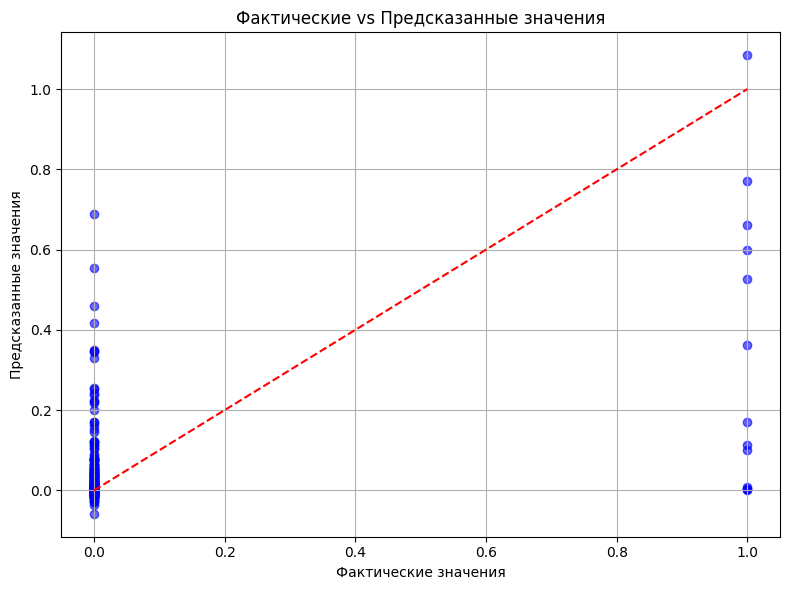

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('valid.csv')

# Выбор числовых признаков и целевой переменной
X = data.select_dtypes(include=['float64', 'int64'])  # Выбираем только числовые столбцы
y = X['target']  # Целевая переменная
X = X.drop(columns=['target'])  # Удаляем целевую переменную из признаков

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных (необязательно для XGBoost, но может помочь)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Преобразование данных в формат DMatrix (требуется для XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Определение параметров модели
params = {
    'objective': 'reg:squarederror',  # Задача регрессии
    'eval_metric': 'rmse',           # Метрика для оценки
    'max_depth': 5,                  # Максимальная глубина деревьев
    'learning_rate': 0.1,            # Скорость обучения
    'n_estimators': 100,             # Количество деревьев
    'subsample': 0.8,                # Доля выборки для обучения каждого дерева
    'colsample_bytree': 0.8,         # Доля признаков для каждого дерева
    'random_state': 42               # Фиксируем случайные состояния
}

# Обучение модели
model = xgb.train(params, dtrain, num_boost_round=100)

# Предсказание на тестовых данных
y_pred = model.predict(dtest)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Анализ ошибок
residuals = y_test - y_pred
print(f"Средняя ошибка: {residuals.mean()}")
print(f"Максимальная ошибка: {residuals.abs().max()}")

# Создание схемы
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# 1. График фактических vs предсказанных значений (регрессия)
axes.scatter(y_test, y_pred, alpha=0.6, color='blue')
axes.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axes.set_title('Фактические vs Предсказанные значения')
axes.set_xlabel('Фактические значения')
axes.set_ylabel('Предсказанные значения')
axes.grid(True)

plt.tight_layout()
plt.show()

Первые строки данных:
   Дата  Цена машиноместа  Количество машиномест  Площадь машиноместа  \
0    21                 1                      0                    0   
1    21                 5                      0                    1   
2    15                 6                      0                    0   
3    19                 7                      0                    0   
4    18                 8                      0                    0   

   Уникальный идентификатор покупки  Скидка  Налог  \
0                                14     1.0    1.0   
1                                32     1.0    1.0   
2                                39     1.0    1.0   
3                                59     1.0    1.0   
4                               113     4.0    4.0   

   Стоимость дополнительных услуг  Общая стоимость  Итоговая сумма  \
0                             3.0       6656046.70    2.231016e+06   
1                             6.0       8193703.78    1.420569e+06   
2   

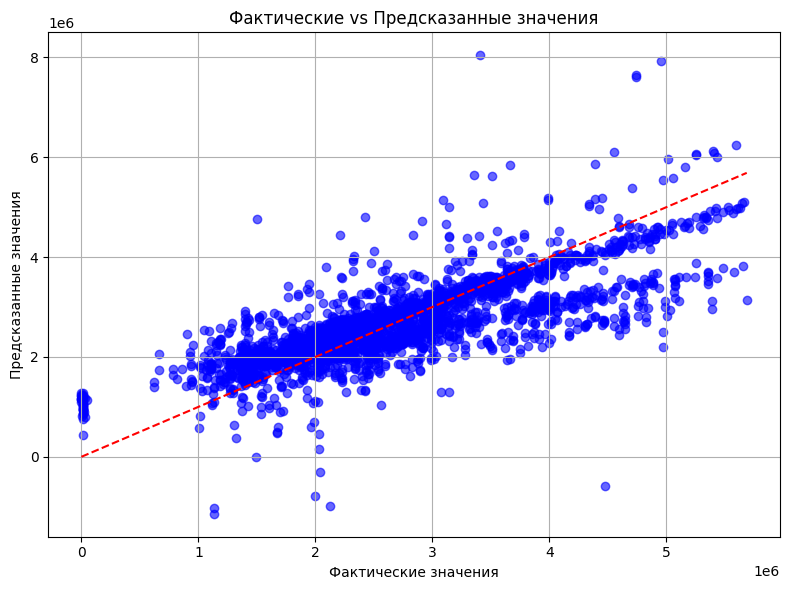

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Загрузка данных
data = pd.read_csv('C:\\Users\\VikA\\Desktop\\интерсив\\cleaned_data.csv')

# Предварительный анализ данных
print("Первые строки данных:")
print(data.head())
print("\nИнформация о данных:")
print(data.info())

# Проверка наличия NaN в данных
print("\nКоличество строк с NaN:", data.isna().any(axis=1).sum())
print("Количество строк без NaN:", data.dropna().shape[0])

# Удаление столбцов, в которых более 50% значений — NaN
threshold = 0.5
data_cleaned = data.dropna(thresh=data.shape[0] * threshold, axis=1)

# Проверка данных после удаления столбцов
print("\nРазмер данных после удаления столбцов:", data_cleaned.shape)

# Удаление нечисловых столбцов
data_cleaned = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Проверка данных после удаления нечисловых столбцов
print("Размер данных после удаления нечисловых столбцов:", data_cleaned.shape)

# Заполнение NaN средними значениями
imputer = SimpleImputer(strategy='mean')  # Можно использовать 'median' или 'most_frequent'
data_cleaned = pd.DataFrame(imputer.fit_transform(data_cleaned), columns=data_cleaned.columns)

# Проверка данных после заполнения NaN
print("Размер данных после заполнения NaN:", data_cleaned.shape)

# Проверка, что данные не пустые
if data_cleaned.empty:
    raise ValueError("Данные после обработки стали пустыми. Проверьте данные.")

# Выбор признаков и целевой переменной
# Предположим, что 'Итоговая сумма' является целевой переменной
data_cleaned = data.rename(columns={'Итоговая сумма': 'target'})
X = data_cleaned.drop(columns=['target'])  # Удаляем целевую переменную
y = data_cleaned['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение модели регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



import matplotlib.pyplot as plt

# Создание схемы
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# 1. График фактических vs предсказанных значений (регрессия)
axes.scatter(y_test, y_pred, alpha=0.6, color='blue')
axes.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axes.set_title('Фактические vs Предсказанные значения')
axes.set_xlabel('Фактические значения')
axes.set_ylabel('Предсказанные значения')
axes.grid(True)

plt.tight_layout()
plt.show()

Mean Squared Error: 4599041701096.849


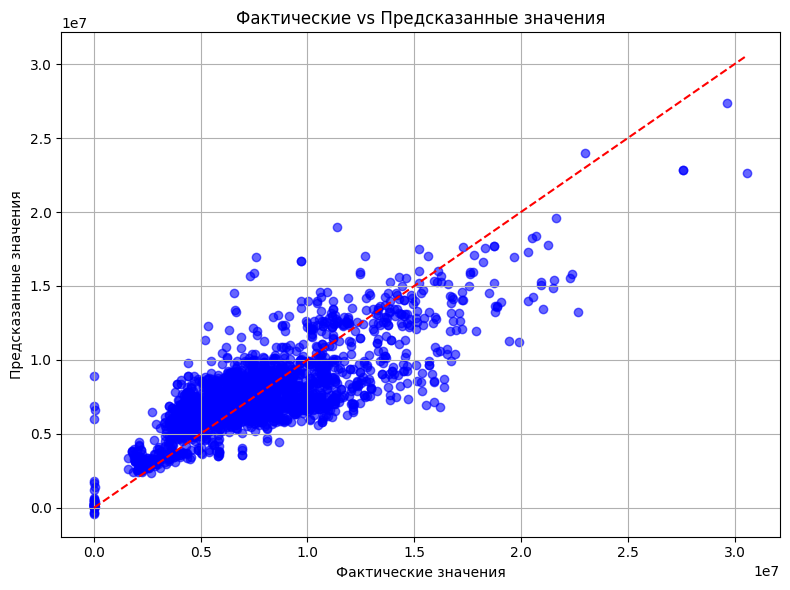

In [25]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Загрузка данных
data = pd.read_csv('cleaned_data.csv')

# Выбор признаков и целевой переменной
X = data.drop(columns=['Общая стоимость', 'Итоговая сумма', 'Сумма платежа', 'Итоговая сумма с комиссией'])
y = data['Общая стоимость']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

import matplotlib.pyplot as plt

# Создание схемы
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# 1. График фактических vs предсказанных значений (регрессия)
axes.scatter(y_test, y_pred, alpha=0.6, color='blue')
axes.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axes.set_title('Фактические vs Предсказанные значения')
axes.set_xlabel('Фактические значения')
axes.set_ylabel('Предсказанные значения')
axes.grid(True)

plt.tight_layout()
plt.show()

c:\Users\VikA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 67645315481600.0000 - mse: 67645315481600.0000 - val_loss: 70110907727872.0000 - val_mse: 70110907727872.0000
Epoch 2/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 68992882442240.0000 - mse: 68992882442240.0000 - val_loss: 70074643775488.0000 - val_mse: 70074643775488.0000
Epoch 3/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 68677282037760.0000 - mse: 68677282037760.0000 - val_loss: 69976761303040.0000 - val_mse: 69976761303040.0000
Epoch 4/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 67748948344832.0000 - mse: 67748948344832.0000 - val_loss: 69795970023424.0000 - val_mse: 69795970023424.0000
Epoch 5/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 67534099316736.0000 - mse: 67534099316736.0000 - val_loss: 69517111721984.0000 - val_mse: 69517111721984.0000
Epoch 6/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 67570937888768.0000 - mse: 67570937888768.0000 - val_loss: 69130535305216.0000 - val_mse: 

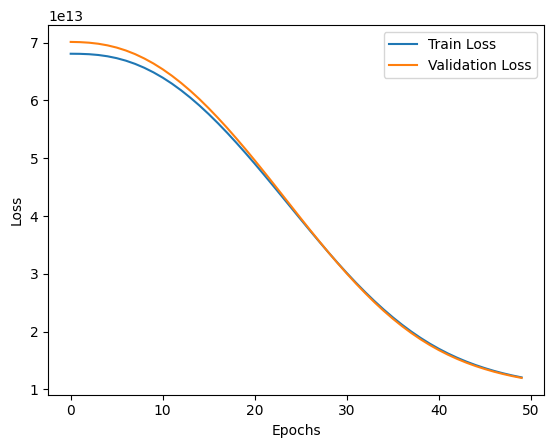

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Загрузка данных
data = pd.read_csv('cleaned_data.csv')

# Выбор признаков и целевой переменной
X = data.drop(columns=['Общая стоимость', 'Итоговая сумма', 'Сумма платежа', 'Итоговая сумма с комиссией'])
y = data['Общая стоимость']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели нейронной сети
model = Sequential()

# Входной слой и первый скрытый слой
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Второй скрытый слой
model.add(Dense(32, activation='relu'))

# Выходной слой
model.add(Dense(1, activation='linear'))  # Линейная активация для регрессии

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# График потерь на обучающей и валидационной выборках
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

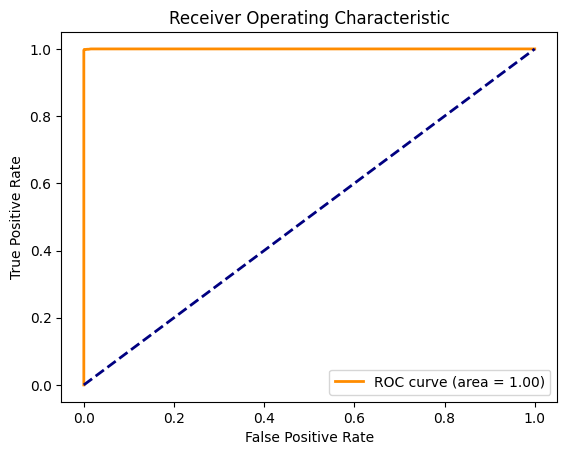

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('cleaned_data.csv')

# Создание бинарной целевой переменной
threshold = 10
data['Target'] = (data['Сумма платежа'] > threshold).astype(int)

# Выбор признаков и целевой переменной
X = data.drop(columns=['Сумма платежа', 'Target'])
y = data['Target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Обучение модели RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# Предсказание вероятностей для тестовой выборки
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой и AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
# Построение графика
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


c:\Users\VikA\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:55:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


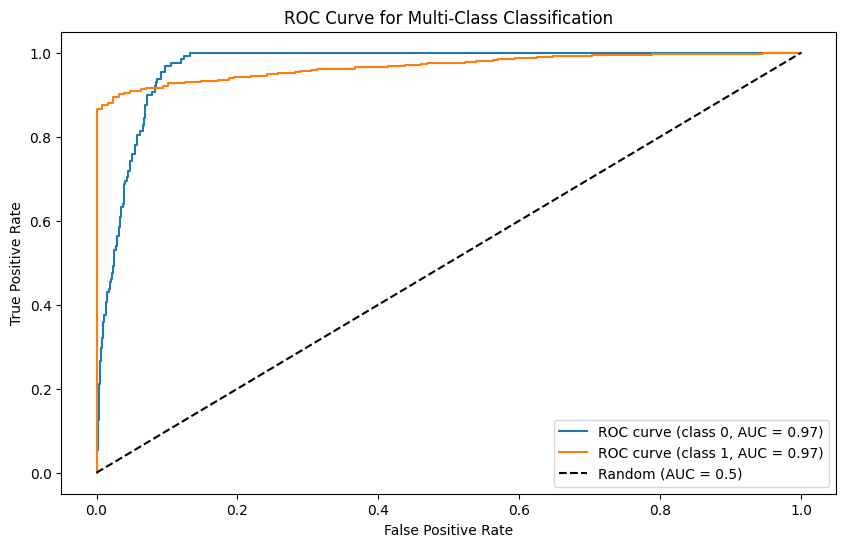

In [8]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
data = pd.read_csv('cleaned_data.csv')

# Выбор признаков и целевой переменной
X = data.drop(columns=['Площадь машиноместа', 'Уникальный идентификатор покупки'])  # Удаляем ненужные столбцы
y = data['Площадь машиноместа']

# Преобразование задачи регрессии в задачу классификации
# Разделение на категории (например, низкая, средняя, высокая сумма)
bins = [0, 100, 500, np.inf]  # Пример разбиения на категории
labels = [0, 1, 2]  # Метки для категорий
y_cat = pd.cut(y, bins=bins, labels=labels)

# Преобразование категорий в числа
le = LabelEncoder()
y_encoded = le.fit_transform(y_cat)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Масштабирование данных (необязательно для XGBoost, но может помочь)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Преобразование данных в формат DMatrix (требуется для XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Определение параметров модели для классификации
params = {
    'objective': 'multi:softprob',  # Мультиклассовая классификация
    'num_class': len(np.unique(y_encoded)),  # Количество классов
    'eval_metric': 'mlogloss',  # Метрика для оценки
    'max_depth': 5,  # Максимальная глубина деревьев
    'learning_rate': 0.1,  # Скорость обучения
    'n_estimators': 100,  # Количество деревьев
    'subsample': 0.8,  # Доля выборки для обучения каждого дерева
    'colsample_bytree': 0.8,  # Доля признаков для каждого дерева
    'random_state': 42  # Фиксируем случайные состояния
}

# Обучение модели
model = xgb.train(params, dtrain, num_boost_round=100)

# Предсказание вероятностей для тестовых данных
y_pred_proba = model.predict(dtest)

# Построение кривой ROC для каждого класса
n_classes = len(np.unique(y_encoded))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # Вычисление FPR и TPR для каждого класса
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение графика AUC-ROC
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')

# Добавление диагональной линии для сравнения
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()